In [1]:
import pandas as pd
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
stores = pd.read_csv('stores.csv')
features = pd.read_csv('features.csv')
sample_submission = pd.read_csv('sampleSubmission.csv')

In [2]:
print("Train Data:\n", train.head())
print("Test Data:\n", test.head())
print("Stores Data:\n", stores.head())
print("Features Data:\n", features.head())
print("Sample Submission:\n", sample_submission.head())

Train Data:
    Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-12      46039.49       True
2      1     1  2010-02-19      41595.55      False
3      1     1  2010-02-26      19403.54      False
4      1     1  2010-03-05      21827.90      False
Test Data:
    Store  Dept        Date  IsHoliday
0      1     1  2012-11-02      False
1      1     1  2012-11-09      False
2      1     1  2012-11-16      False
3      1     1  2012-11-23       True
4      1     1  2012-11-30      False
Stores Data:
    Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875
Features Data:
    Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  2010-02-05        42.31       2.572        NaN        NaN   
1      1  2010-02-12        38.51       2.548        NaN        NaN   
2      1  2010-02-19        39.93       2.514        NaN    

In [3]:
# Merge datasets
train_merged = train.merge(stores, on='Store').merge(features, on=['Store', 'Date'])
test_merged = test.merge(stores, on='Store').merge(features, on=['Store', 'Date'])

In [4]:
print("Merged Train Data:\n", train_merged.head())
print("Merged Test Data:\n", test_merged.head())

Merged Train Data:
    Store  Dept        Date  Weekly_Sales  IsHoliday_x Type    Size  \
0      1     1  2010-02-05      24924.50        False    A  151315   
1      1     1  2010-02-12      46039.49         True    A  151315   
2      1     1  2010-02-19      41595.55        False    A  151315   
3      1     1  2010-02-26      19403.54        False    A  151315   
4      1     1  2010-03-05      21827.90        False    A  151315   

   Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  \
0        42.31       2.572        NaN        NaN        NaN        NaN   
1        38.51       2.548        NaN        NaN        NaN        NaN   
2        39.93       2.514        NaN        NaN        NaN        NaN   
3        46.63       2.561        NaN        NaN        NaN        NaN   
4        46.50       2.625        NaN        NaN        NaN        NaN   

   MarkDown5         CPI  Unemployment  IsHoliday_y  
0        NaN  211.096358         8.106        False  
1     

In [5]:
# Check for missing values
print("Missing values in train:\n", train.isnull().sum())
print("Missing values in test:\n", test.isnull().sum())
print("Missing values in stores:\n", stores.isnull().sum())
print("Missing values in features:\n", features.isnull().sum())

Missing values in train:
 Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64
Missing values in test:
 Store        0
Dept         0
Date         0
IsHoliday    0
dtype: int64
Missing values in stores:
 Store    0
Type     0
Size     0
dtype: int64
Missing values in features:
 Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64


In [6]:
import pandas as pd
features = pd.read_csv('features.csv')
print("Missing values in features before handling:\n", features.isnull().sum())
markdown_columns = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
features[markdown_columns] = features[markdown_columns].fillna(0)
features['CPI'].fillna(method='ffill', inplace=True)
features['Unemployment'].fillna(method='ffill', inplace=True)
features['CPI'].fillna(features['CPI'].median(), inplace=True)
features['Unemployment'].fillna(features['Unemployment'].median(), inplace=True)
print("Missing values in features after handling:\n", features.isnull().sum())

Missing values in features before handling:
 Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64
Missing values in features after handling:
 Store           0
Date            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
dtype: int64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8528\3644701064.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  features['CPI'].fillna(method='ffill', inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8528\3644701064.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  features['CPI'].fillna(method='ffill', inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8528\3644701064.py:7: FutureWarning: A value is trying to be set o

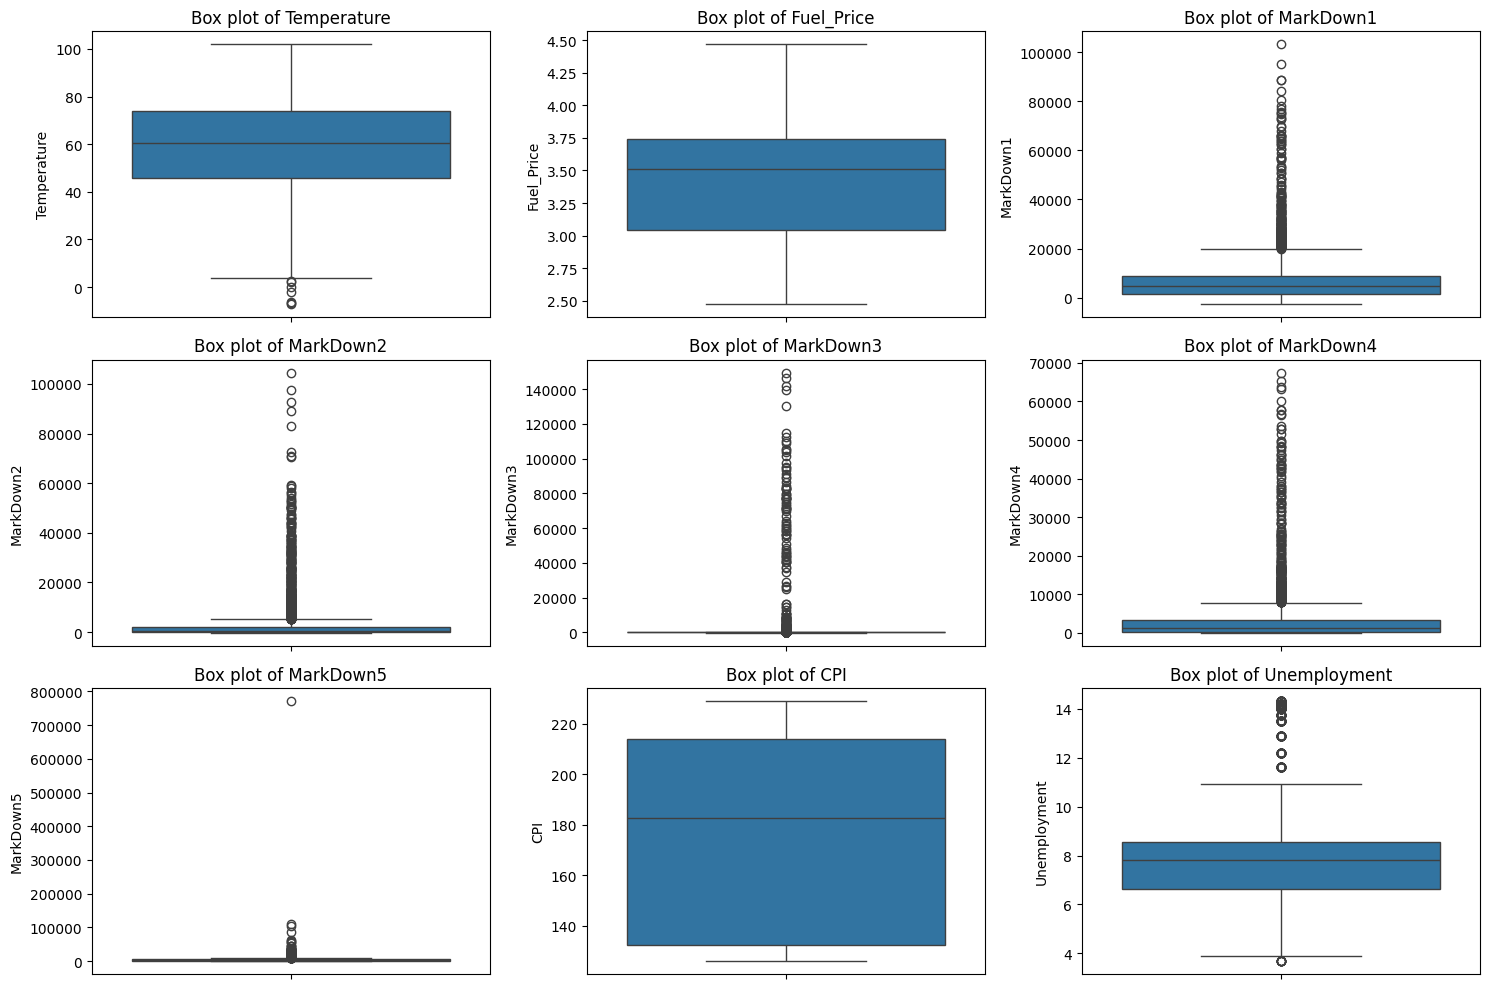

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

features = pd.read_csv('features.csv')

features.head()

numerical_columns = ['Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment']
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=features[column])
    plt.title(f'Box plot of {column}')
plt.tight_layout()
plt.show()

In [11]:
# Function to calculate and return the number of outliers using the IQR method
def count_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return len(outliers)

# Count outliers for each numerical column
outliers_count = {column: count_outliers_iqr(features, column) for column in numerical_columns}

# Display the number of outliers for each column
for column, count in outliers_count.items():
    print(f"Number of outliers in {column}: {count}")

Number of outliers in Temperature: 7
Number of outliers in Fuel_Price: 0
Number of outliers in MarkDown1: 237
Number of outliers in MarkDown2: 436
Number of outliers in MarkDown3: 480
Number of outliers in MarkDown4: 337
Number of outliers in MarkDown5: 212
Number of outliers in CPI: 0
Number of outliers in Unemployment: 386


In [12]:
import numpy as np

# Function to cap outliers using the IQR method
def cap_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

# Columns with significant number of outliers
outlier_columns = ['Temperature', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'Unemployment']

# Cap outliers for each numerical column with significant outliers
for column in outlier_columns:
    features = cap_outliers_iqr(features, column)

# Display the dataset after capping outliers
print("Features dataset after capping outliers:\n", features.describe())

# Check for any remaining outliers
outliers_count_after_capping = {column: count_outliers_iqr(features, column) for column in numerical_columns}

# Display the number of outliers for each column after capping
for column, count in outliers_count_after_capping.items():
    print(f"Number of outliers in {column} after capping: {count}")

Features dataset after capping outliers:
              Store  Temperature   Fuel_Price     MarkDown1    MarkDown2  \
count  8190.000000  8190.000000  8190.000000   4032.000000  2921.000000   
mean     23.000000    59.361640     3.405992   6140.287525  1438.058617   
std      12.987966    18.661167     0.431337   5587.148055  1932.543911   
min       1.000000     3.936250     2.472000  -2781.450000  -265.760000   
25%      12.000000    45.902500     3.041000   1577.532500    68.880000   
50%      23.000000    60.710000     3.513000   4743.580000   364.570000   
75%      34.000000    73.880000     3.743000   8923.310000  2153.350000   
max      45.000000   101.950000     4.468000  19941.976250  5280.055000   

         MarkDown3    MarkDown4    MarkDown5          CPI  Unemployment  
count  3613.000000  3464.000000  4050.000000  7605.000000   7605.000000  
mean    108.276053  2217.706269  3488.839762   172.460809      7.729026  
std     139.614400  2490.369398  2625.117556    39.738346   

In [20]:
print(train.columns)
print(test.columns)
print(stores.columns)
print(features.columns)

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'], dtype='object')
Index(['Store', 'Dept', 'Date', 'IsHoliday'], dtype='object')
Index(['Store', 'Type', 'Size'], dtype='object')
Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday'],
      dtype='object')


In [21]:
import pandas as pd

# Load datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
stores = pd.read_csv('stores.csv')
features = pd.read_csv('features.csv')

# Select necessary columns
train = train[['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday']]
test = test[['Store', 'Dept', 'Date', 'IsHoliday']]
stores = stores[['Store', 'Type', 'Size']]
features = features[['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
                     'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday']]

# Display the first few rows of each dataset to verify the columns
print("train dataset after selecting necessary columns:\n", train.head())
print("\ntest dataset after selecting necessary columns:\n", test.head())
print("\nstores dataset after selecting necessary columns:\n", stores.head())
print("\nfeatures dataset after selecting necessary columns:\n", features.head())

train dataset after selecting necessary columns:
    Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-12      46039.49       True
2      1     1  2010-02-19      41595.55      False
3      1     1  2010-02-26      19403.54      False
4      1     1  2010-03-05      21827.90      False

test dataset after selecting necessary columns:
    Store  Dept        Date  IsHoliday
0      1     1  2012-11-02      False
1      1     1  2012-11-09      False
2      1     1  2012-11-16      False
3      1     1  2012-11-23       True
4      1     1  2012-11-30      False

stores dataset after selecting necessary columns:
    Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875

features dataset after selecting necessary columns:
    Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  2010-02-05        42.31       2.572      

In [22]:
# Check for missing values in each dataset
print("Missing values in train dataset:\n", train.isnull().sum())
print("\nMissing values in test dataset:\n", test.isnull().sum())
print("\nMissing values in stores dataset:\n", stores.isnull().sum())
print("\nMissing values in features dataset:\n", features.isnull().sum())

# Example: Impute missing values in features dataset with median
median_values = features.median()
features.fillna(median_values, inplace=True)

# Verify missing values after handling
print("\nMissing values in features dataset after handling:\n", features.isnull().sum())


Missing values in train dataset:
 Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

Missing values in test dataset:
 Store        0
Dept         0
Date         0
IsHoliday    0
dtype: int64

Missing values in stores dataset:
 Store    0
Type     0
Size     0
dtype: int64

Missing values in features dataset:
 Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64


TypeError: Cannot convert [['2010-02-05' '2010-02-12' '2010-02-19' ... '2013-07-12' '2013-07-19'
  '2013-07-26']] to numeric

In [23]:
import pandas as pd

# Load datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
stores = pd.read_csv('stores.csv')
features = pd.read_csv('features.csv')

# Select necessary columns
train = train[['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday']]
test = test[['Store', 'Dept', 'Date', 'IsHoliday']]
stores = stores[['Store', 'Type', 'Size']]
features = features[['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
                     'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday']]

# Check for missing values in features dataset
print("Missing values in features dataset before handling:\n", features.isnull().sum())

# Handle missing values for numeric columns only
numeric_columns = ['Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
                   'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment']

features[numeric_columns] = features[numeric_columns].fillna(features[numeric_columns].median())

# Verify missing values after handling
print("\nMissing values in features dataset after handling:\n", features.isnull().sum())

Missing values in features dataset before handling:
 Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

Missing values in features dataset after handling:
 Store           0
Date            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
dtype: int64


In [24]:
import pandas as pd
import numpy as np

# Load the features dataset (assuming you've already loaded it)
features = pd.read_csv('features.csv')

# Select necessary columns for outlier detection (assuming numeric columns)
numeric_columns = ['Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
                   'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment']

# Function to detect outliers using IQR
def detect_outliers(df, columns):
    outliers = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
    return outliers

# Detect outliers in numeric columns
outliers_count = detect_outliers(features, numeric_columns)

# Print number of outliers for each column
for col, count in outliers_count.items():
    print(f"Number of outliers in {col}: {count}")

Number of outliers in Temperature: 7
Number of outliers in Fuel_Price: 0
Number of outliers in MarkDown1: 237
Number of outliers in MarkDown2: 436
Number of outliers in MarkDown3: 480
Number of outliers in MarkDown4: 337
Number of outliers in MarkDown5: 212
Number of outliers in CPI: 0
Number of outliers in Unemployment: 386


In [27]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Example dataset (assuming 'Type' and 'IsHoliday' are categorical columns)
stores = pd.read_csv('stores.csv')

# Example of Label Encoding for 'Type' column
label_encoder = LabelEncoder()
stores['Type_LabelEncoded'] = label_encoder.fit_transform(stores['Type'])

# Example of One-Hot Encoding for 'IsHoliday' column
holiday_encoded = pd.get_dummies(stores['IsHoliday'], prefix='IsHoliday')

# Concatenate encoded columns back to the original DataFrame
stores_encoded = pd.concat([stores, holiday_encoded], axis=1)

# Display the encoded DataFrame
print(stores_encoded.head())

KeyError: 'IsHoliday'

In [28]:
import pandas as pd

# Example: Load the correct dataset
train = pd.read_csv('train.csv')

# Example of One-Hot Encoding for 'IsHoliday' column in train dataset
holiday_encoded = pd.get_dummies(train['IsHoliday'], prefix='IsHoliday')

# Concatenate encoded columns back to the original DataFrame
train_encoded = pd.concat([train, holiday_encoded], axis=1)

# Display the encoded DataFrame
print(train_encoded.head())

   Store  Dept        Date  Weekly_Sales  IsHoliday  IsHoliday_False  \
0      1     1  2010-02-05      24924.50      False             True   
1      1     1  2010-02-12      46039.49       True            False   
2      1     1  2010-02-19      41595.55      False             True   
3      1     1  2010-02-26      19403.54      False             True   
4      1     1  2010-03-05      21827.90      False             True   

   IsHoliday_True  
0           False  
1            True  
2           False  
3           False  
4           False  


In [34]:
import pandas as pd

# Load datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
stores = pd.read_csv('stores.csv')
features = pd.read_csv('features.csv')

# Display columns for each dataset
print("Columns in train.csv:")
print(train.columns)

print("\nColumns in test.csv:")
print(test.columns)

print("\nColumns in stores.csv:")
print(stores.columns)

print("\nColumns in features.csv:")
print(features.columns)


Columns in train.csv:
Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'], dtype='object')

Columns in test.csv:
Index(['Store', 'Dept', 'Date', 'IsHoliday'], dtype='object')

Columns in stores.csv:
Index(['Store', 'Type', 'Size'], dtype='object')

Columns in features.csv:
Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday'],
      dtype='object')


In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Load datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
stores = pd.read_csv('stores.csv')
features = pd.read_csv('features.csv')

train_merged = pd.merge(train, stores, on='Store', how='left')
train_merged = pd.merge(train_merged, features, on=['Store', 'Date'], how='left')

stores_encoded = pd.get_dummies(train_merged['Type'], prefix='Type')
train_merged = pd.concat([train_merged, stores_encoded], axis=1)

drop_columns = ['Store', 'Dept', 'Date', 'Type']  # Example, adjust as needed
X = train_merged.drop(['Weekly_Sales'] + drop_columns, axis=1)
y = train_merged['Weekly_Sales']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

regression_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                      ('regressor', LinearRegression())])

regression_pipeline.fit(X_train, y_train)

y_pred = regression_pipeline.predict(X_valid)

mae = mean_absolute_error(y_valid, y_pred)
print(f"Mean Absolute Error on Validation Set: {mae:.2f}")

test_merged = pd.merge(test, stores, on='Store', how='left')
test_merged = pd.merge(test_merged, features, on=['Store', 'Date'], how='left')
test_encoded = pd.get_dummies(test_merged['Type'], prefix='Type')
test_merged = pd.concat([test_merged, test_encoded], axis=1)
X_test = test_merged.drop(drop_columns, axis=1)

test_predictions = regression_pipeline.predict(X_test)

test['Predicted_Weekly_Sales'] = test_predictions
test[['Store', 'Dept', 'Date', 'Predicted_Weekly_Sales']].to_csv('predicted_sales.csv', index=False)

print("\nSample Predictions:")
print(test[['Store', 'Dept', 'Date', 'Predicted_Weekly_Sales']].head())

Mean Absolute Error on Validation Set: 14510.18

Sample Predictions:
   Store  Dept        Date  Predicted_Weekly_Sales
0      1     1  2012-11-02            16248.169254
1      1     1  2012-11-09            16707.381843
2      1     1  2012-11-16            16270.393730
3      1     1  2012-11-23            24979.034388
4      1     1  2012-11-30            16833.775218


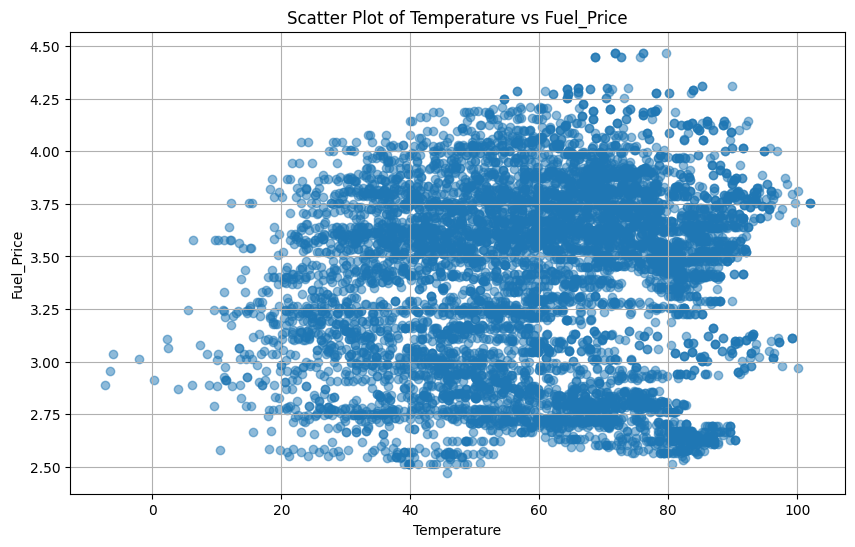

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
features = pd.read_csv('features.csv')
x = features['Temperature']
y = features['Fuel_Price']
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5)
plt.title('Scatter Plot of Temperature vs Fuel_Price')
plt.xlabel('Temperature')
plt.ylabel('Fuel_Price')
plt.grid(True)
plt.show()

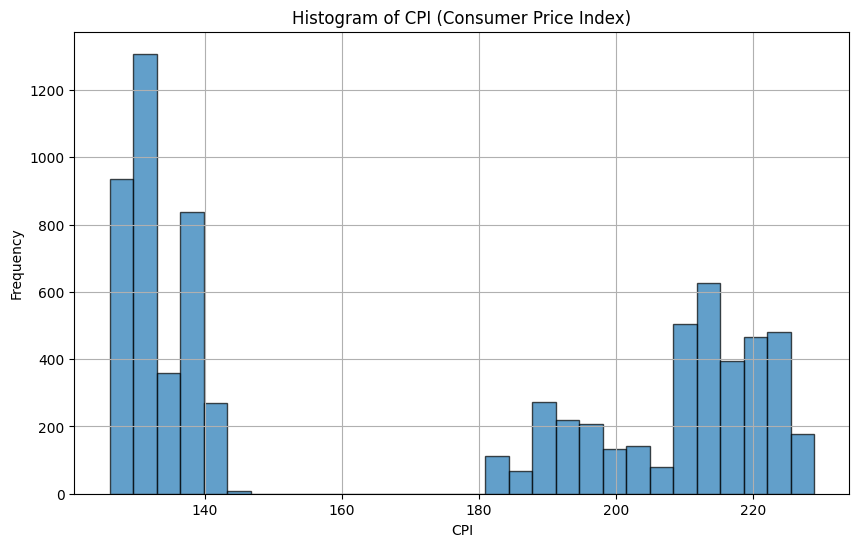

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
features = pd.read_csv('features.csv')
data = features['CPI']
plt.figure(figsize=(10, 6))
plt.hist(data, bins=30, edgecolor='black', alpha=0.7)
plt.title('Histogram of CPI (Consumer Price Index)')
plt.xlabel('CPI')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8528\919955513.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_counts.index, y=type_counts.values, palette='viridis')


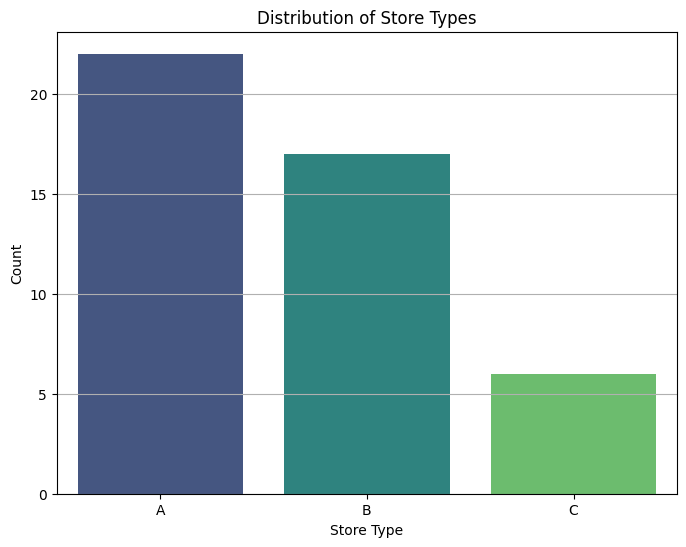

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

stores = pd.read_csv('stores.csv')

type_counts = stores['Type'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=type_counts.index, y=type_counts.values, palette='viridis')
plt.title('Distribution of Store Types')
plt.xlabel('Store Type')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

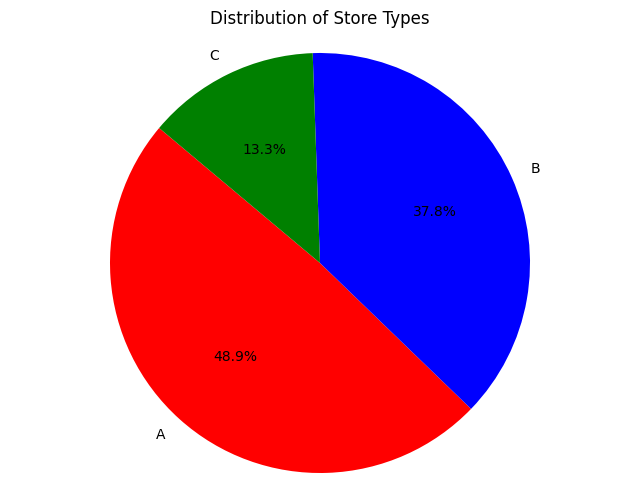

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
stores = pd.read_csv('stores.csv')
type_counts = stores['Type'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140, colors=['red', 'blue', 'green'])
plt.title('Distribution of Store Types')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

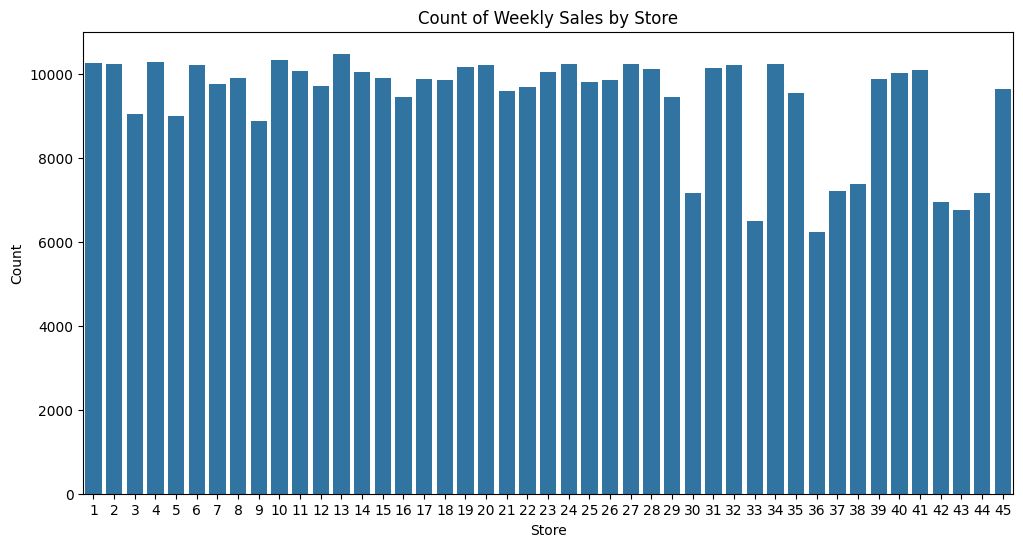

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
train = pd.read_csv('train.csv')
plt.figure(figsize=(12, 6))
sns.countplot(x='Store', data=train)
plt.title('Count of Weekly Sales by Store')
plt.xlabel('Store')
plt.ylabel('Count')
plt.show()

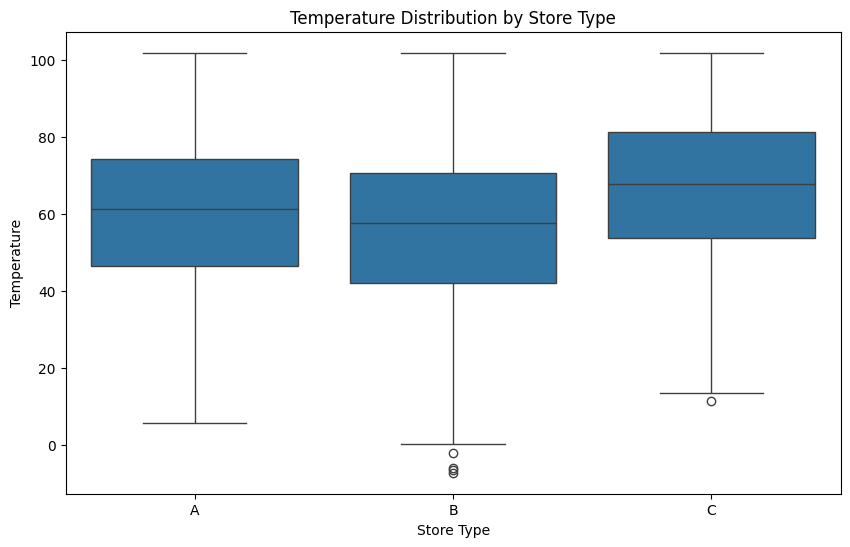

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

features = pd.read_csv('features.csv')
stores = pd.read_csv('stores.csv')
merged_data = pd.merge(features, stores[['Store', 'Type']], on='Store')
plt.figure(figsize=(10, 6))
sns.boxplot(x='Type', y='Temperature', data=merged_data)
plt.title('Temperature Distribution by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Temperature')
plt.show()

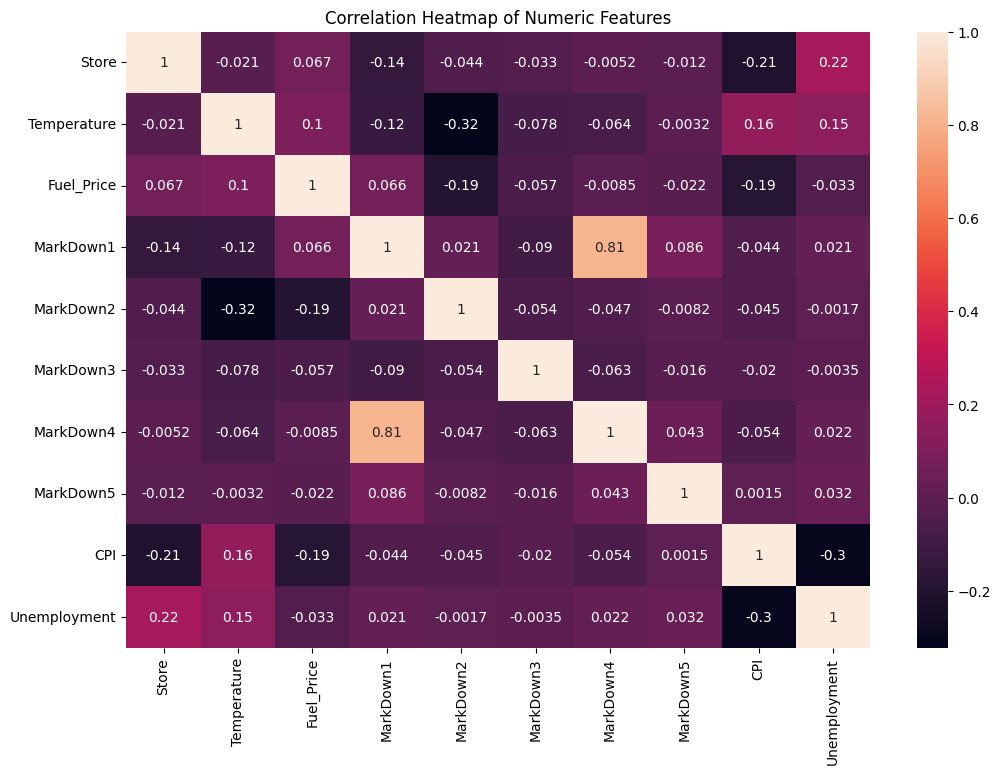

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
features = pd.read_csv('features.csv')
numeric_features = features.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_features.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()